<a href="https://colab.research.google.com/github/Vilars/Data-205/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#import dataset
t_df = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data-205/refs/heads/main/Troubled.csv', index_col=0)

In [3]:
t_df.head()

,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Next Inspection Date,Inspection Frequency,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
License Number,,,,,,,,,,,,,,,,,,,,
62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,06/15/2023,NaN,3.0,1,457,110,0.54,0.72,68,0.00,0.0,compliant,"(38.9893, -77.0278)"
17369,"Schrider Street, 8115",8115 Schrider St,Silver Spring,20910,178075,-77.014091,38.991809,04/18/2023,NaN,2.0,1,9,11,3.72,1.67,2,0.27,0.0,troubled,"(38.9918, -77.0141)"
17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,04/13/2023,NaN,3.0,1,71,58,1.62,1.13,26,0.05,0.0,compliant,"(39.1769, -77.2349)"
17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,03/29/2023,NaN,2.0,1,218,63,0.85,1.11,28,0.03,0.0,compliant,"(39.1921, -77.2475)"
17286,"Kennebec Avenue, 903",903 KENNEBEC AVE,Takoma Park,20912,158817,-76.999427,38.990245,01/23/2020,NaN,2.0,0,1,0,0.00,0.00,0,0.00,0.0,TBD,"(38.9902, -76.9994)"


In [4]:
# fix city names
t_df['City'] = t_df['City'].str.title()

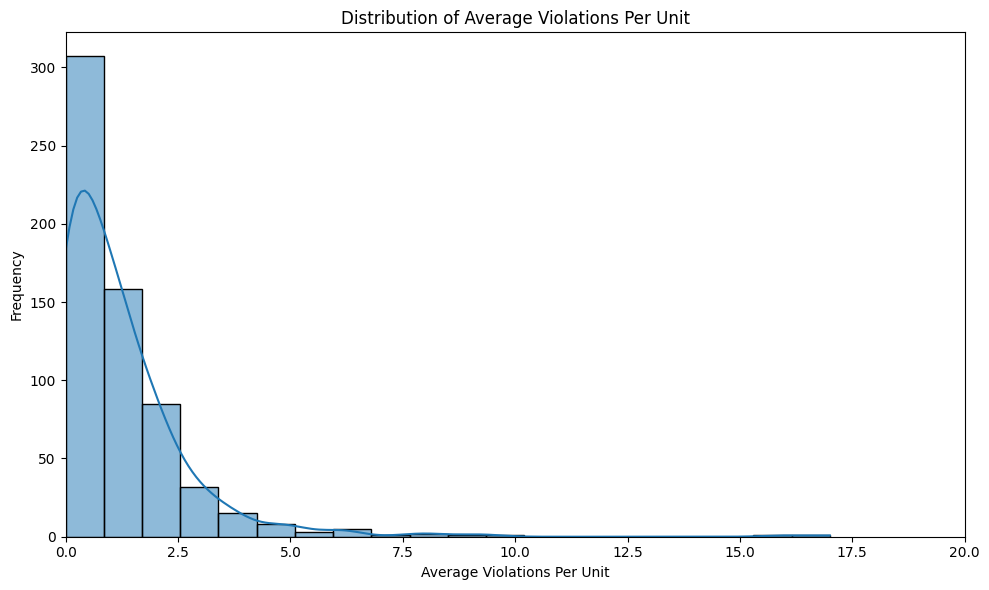

In [31]:
# distribution of average violation per unit
plt.figure(figsize=(10, 6))
sns.histplot(t_df['Average Violations Per Unit'], bins=20, kde=True)
plt.xlabel('Average Violations Per Unit')
plt.ylabel('Frequency')
plt.title('Distribution of Average Violations Per Unit')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

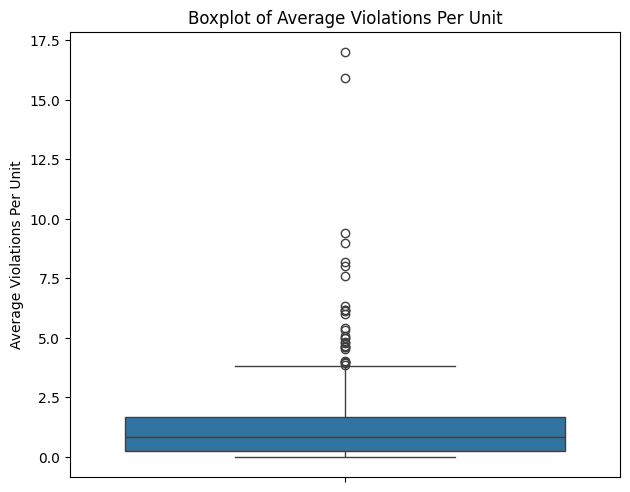

In [32]:
# Boxplot average violation per unit

sns.boxplot(y = 'Average Violations Per Unit', data = t_df)
plt.tight_layout()
plt.title('Boxplot of Average Violations Per Unit')
plt.ylabel('Average Violations Per Unit')
plt.show()


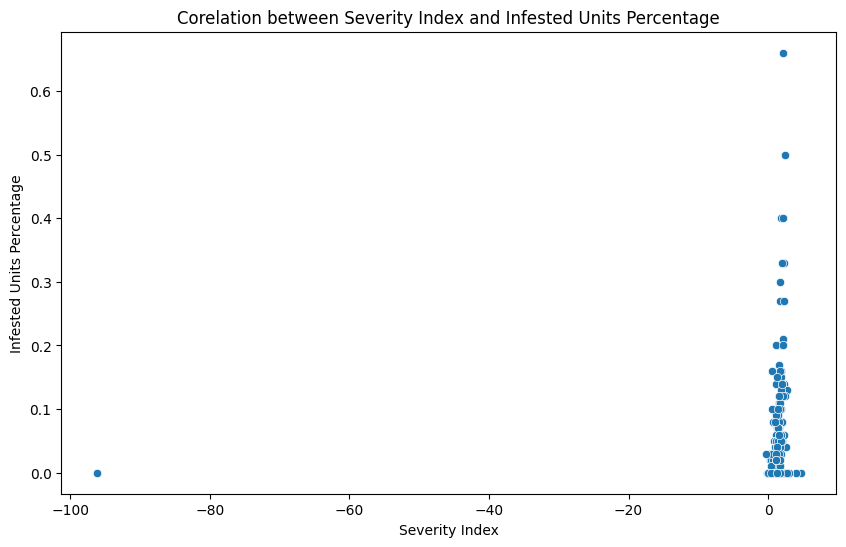

In [10]:
# Corelation between severity index and infested unit
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Severity Index', y = 'Infested Units Percentage', data = t_df)
plt.xlabel('Severity Index')
plt.ylabel('Infested Units Percentage')
plt.title('Corelation between Severity Index and Infested Units Percentage')

plt.show()

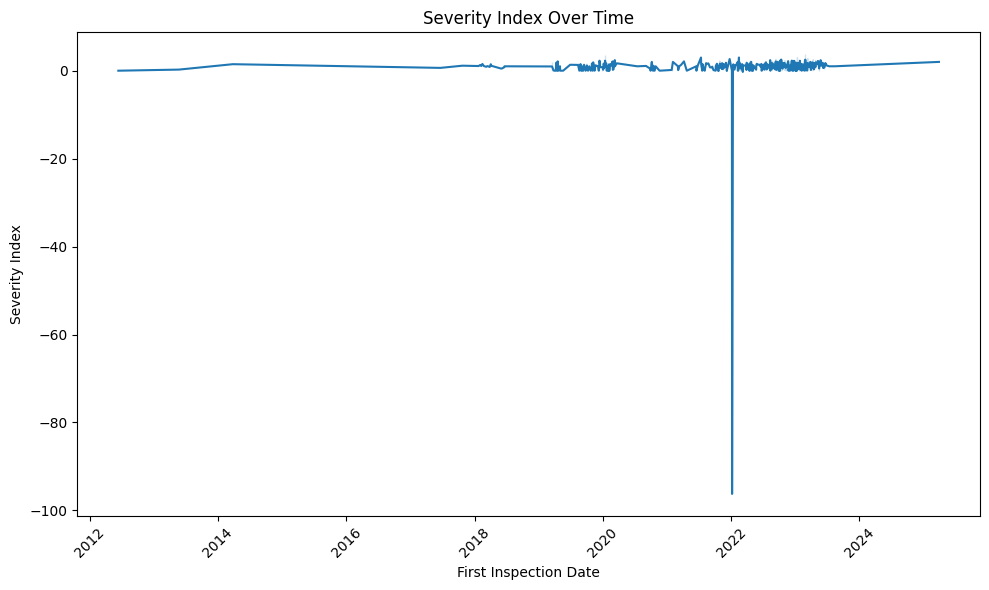

In [9]:
# convert dates
t_df['First Inspection Date'] = pd.to_datetime(t_df['First Inspection Date'], format = '%m/%d/%Y')


# Severity Index over time
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'First Inspection Date', y = 'Severity Index', data = t_df)
plt.xlabel('First Inspection Date')
plt.ylabel('Severity Index')
plt.title('Severity Index Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

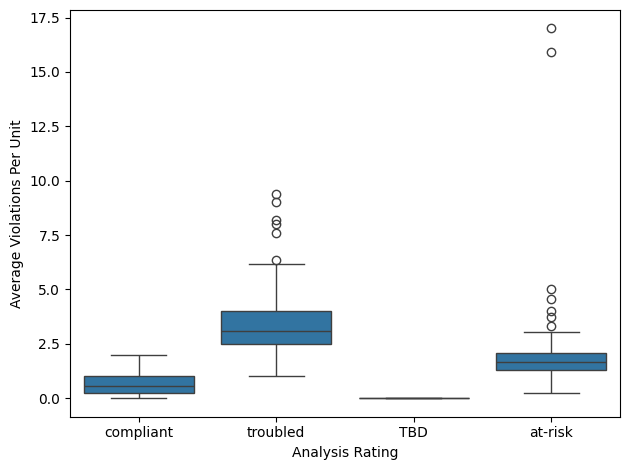

In [29]:
# filter based on status
compliant_df =  t_df[t_df['Analysis Rating'] == 'compliant']
troubled_df = t_df[t_df['Analysis Rating'] == 'troubled']

# plot
sns.boxplot(x = 'Analysis Rating', y = 'Average Violations Per Unit', data = t_df)
plt.tight_layout()
plt.show()



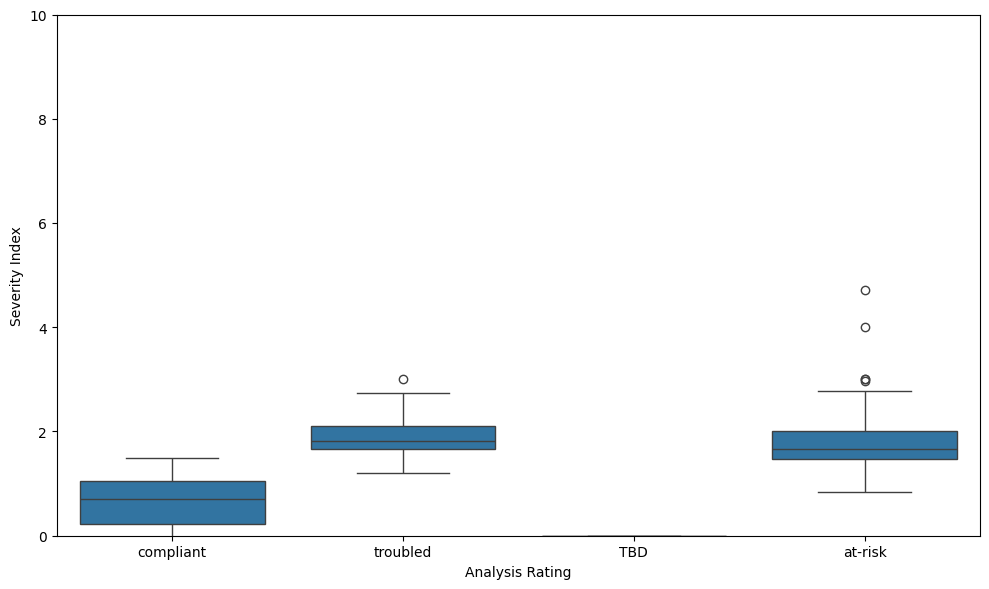

In [28]:
# Severity index
plt.figure(figsize=(10, 6))
compliant_severity = compliant_df['Severity Index']
troubled_severity = troubled_df['Severity Index']

# plot
sns.boxplot(x = 'Analysis Rating', y = 'Severity Index', data = t_df)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

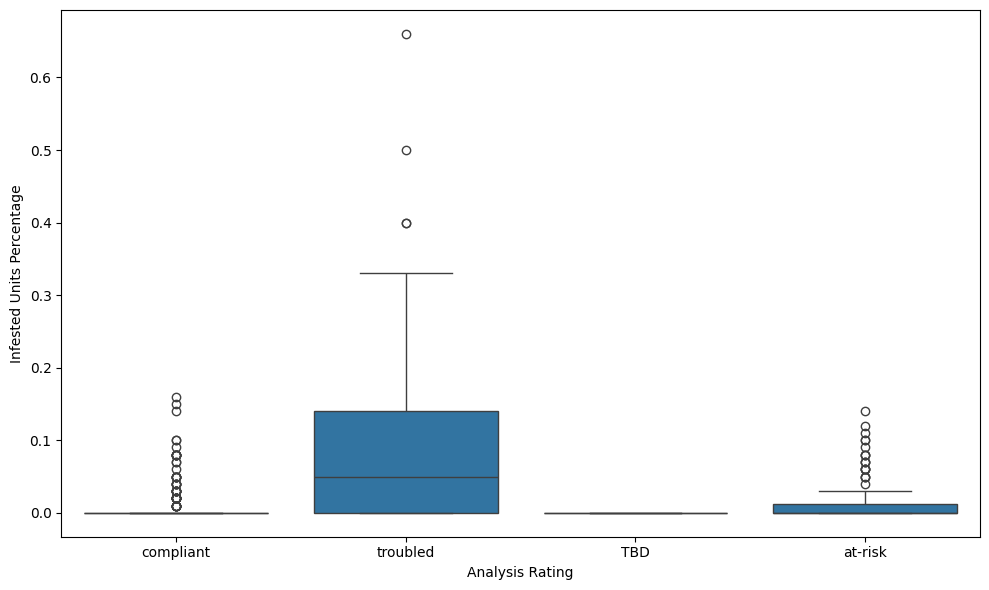

In [27]:
# Infestation
plt.figure(figsize=(10, 6))
compliant_infestation = compliant_df['Infested Units Percentage']
troubled_infestation = troubled_df['Infested Units Percentage']

sns.boxplot(x = 'Analysis Rating', y = 'Infested Units Percentage', data = t_df)
plt.tight_layout()
plt.show()